In [ ]:
import pandas as pd

df = pd.read_csv("/kaggle/input/tv-ratings-and-major-narrative-events-dataset/TV Shows Dataset Major Events - episodes.csv")
event_eps = df[df["is_event"] == 1]
normal_eps = df[df["is_event"] == 0]
event_stats = event_eps["imdb_rating"].describe()
normal_stats = normal_eps["imdb_rating"].describe()

print("Event Episodes:\n", event_stats)
print("\nNormal Episodes:\n", normal_stats)


In [11]:
event_mean = event_eps["imdb_rating"].mean()
normal_mean = normal_eps["imdb_rating"].mean()

print("Event Mean:", event_mean)
print("Normal Mean:", normal_mean)


Event Mean: 8.701734104046242
Normal Mean: 8.436609336609337


/tmp/ipykernel_55/958140995.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


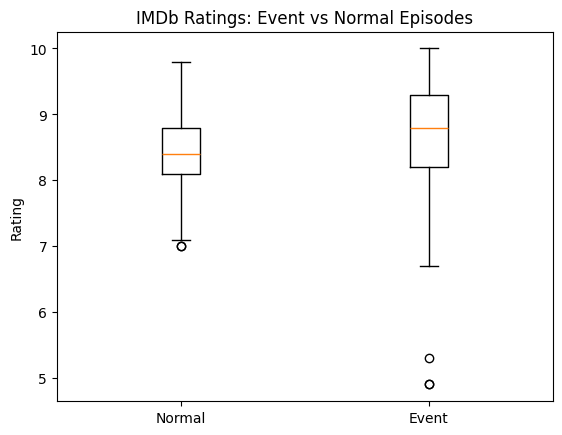

In [12]:
import matplotlib.pyplot as plt

plt.boxplot(
    [normal_eps["imdb_rating"], event_eps["imdb_rating"]],
    labels=["Normal", "Event"]
)
plt.title("IMDb Ratings: Event vs Normal Episodes")
plt.ylabel("Rating")
plt.show()


In [16]:
print("Normal mean is ", normal_mean)
print("Event mean is ", event_mean)


Normal mean is  8.436609336609337
Event mean is  8.701734104046242


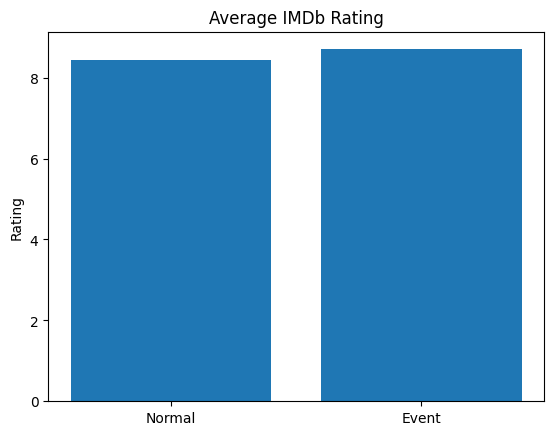

In [13]:
plt.bar(["Normal", "Event"], [normal_mean, event_mean])
plt.title("Average IMDb Rating")
plt.ylabel("Rating")
plt.show()


In [14]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(
    event_eps["imdb_rating"],
    normal_eps["imdb_rating"],
    equal_var=False
)

print("p-value:", p_val)


p-value: 0.00017352779026095003


In [17]:
import numpy as np

diff = event_mean - normal_mean
pooled_std = np.sqrt((event_eps["imdb_rating"].std()**2 + normal_eps["imdb_rating"].std()**2)/2)
cohens_d = diff / pooled_std

cohens_d


np.float64(0.37441564768452196)

Episodes marked as major narrative events averaged an IMDb rating of 8.7, compared to 8.4 for non-event episodes. A two-sample t-test produced a p-value of 0.00017, indicating the difference is statistically significant. This suggests that audiences consistently rate pivotal plot moments higher, reinforcing the idea that major narrative developments drive viewer engagement and satisfaction.